**Loading data**

In [101]:
import pandas as pd 
data = pd.read_csv(r'C:\Users\Shant\OneDrive\Рабочий стол/new york data.csv')

In [102]:
data

id                                               name   host_id  \
0          2539                 Clean & quiet apt home by the park      2787   
1          2595                              Skylit Midtown Castle      2845   
2          3647                THE VILLAGE OF HARLEM....NEW YORK !      4632   
3          3831                    Cozy Entire Floor of Brownstone      4869   
4          5022   Entire Apt: Spacious Studio/Loft by central park      7192   
...         ...                                                ...       ...   
48890  36484665    Charming one bedroom - newly renovated rowhouse   8232441   
48891  36485057      Affordable room in Bushwick/East Williamsburg   6570630   
48892  36485431            Sunny Studio at Historical Neighborhood  23492952   
48893  36485609               43rd St. Time Square-cozy single bed  30985759   
48894  36487245  Trendy duplex in the very heart of Hell's Kitchen  68119814   

           host_name neighbourhood_group       neighbourhood  latitude  \
0               John            Brooklyn          Kensington  40.64749   
1           Jennifer           Manhattan             Midtown  40.75362   
2          Elisabeth           Manhattan              Harlem  40.80902   
3        LisaRoxanne            Brooklyn        Clinton Hill  40.68514   
4              Laura           Manhattan         East Harlem  40.79851   
...              ...                 ...                 ...       ...   
48890        Sabrina            Brooklyn  Bedford-Stuyvesant  40.67853   
48891        Marisol            Brooklyn            Bushwick  40.70184   
48892  Ilgar & Aysel           Manhattan              Harlem  40.81475   
48893            Taz           Manhattan      Hell's Kitchen  40.75751   
48894     Christophe           Manhattan      Hell's Kitchen  40.76404   

       longitude        room_type  price  minimum_nights  number_of_reviews  \
0      -73.97237     Private room    149               1                  9   
1      -73.98377  Entire home/apt    225               1                 45   
2      -73.94190     Private room    150               3                  0   
3      -73.95976  Entire home/apt     89               1                270   
4      -73.94399  Entire home/apt     80              10                  9   
...          ...              ...    ...             ...                ...   
48890  -73.94995     Private room     70               2                  0   
48891  -73.93317     Private room     40               4                  0   
48892  -73.94867  Entire home/apt    115              10                  0   
48893  -73.99112      Shared room     55               1                  0   
48894  -73.98933     Private room     90               7                  0   

      last_review  reviews_per_month  calculated_host_listings_count  \
0      2018-10-19               0.21                               6   
1      2019-05-21               0.38                               2   
2             NaN                NaN                               1   
3      2019-07-05               4.64                               1   
4      2018-11-19               0.10                               1   
...           ...                ...                             ...   
48890         NaN                NaN                               2   
48891         NaN                NaN                               2   
48892         NaN                NaN                               1   
48893         NaN                NaN                               6   
48894         NaN                NaN                               1   

       availability_365  
0                   365  
1                   355  
2                   365  
3                   194  
4                     0  
...                 ...  
48890                 9  
48891                36  
48892                27  
48893                 2  
48894                23  

[48895 rows x 16 columns]

**Import libraries** 

In [103]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import optuna
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from xgboost import XGBRegressor, XGBClassifier
from catboost import CatBoostRegressor, CatBoostClassifier
from sklearn.linear_model import Lasso, Ridge, LogisticRegression
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
from lightgbm import LGBMClassifier, LGBMRegressor
import plotly.express as px
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from catboost import CatBoostRegressor
import optuna

**Exploratory Data Analysis**

In [104]:
data.shape

(48895, 16)

In [105]:
data.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

**Checking for duplicates**

In [106]:
data.duplicated().sum()
data.drop_duplicates(inplace=True)

**Checking for passes**

In [107]:
data.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

**Removing unnecessary columns**

In [108]:
data.drop(['name','id','host_name','last_review', 'host_id'], axis=1, inplace=True)

In [109]:
data.isnull().sum()

neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

**Processing passes**

In [110]:
data.fillna({'reviews_per_month':0}, inplace=True)

data.reviews_per_month.isna().any().sum()

0

**Making a list with numeric features**

In [111]:
data_num = data.drop(['neighbourhood_group','neighbourhood_group','room_type', 'neighbourhood'], axis=1)

**We look at the correlation of features**

Index(['host_id', 'latitude', 'longitude', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

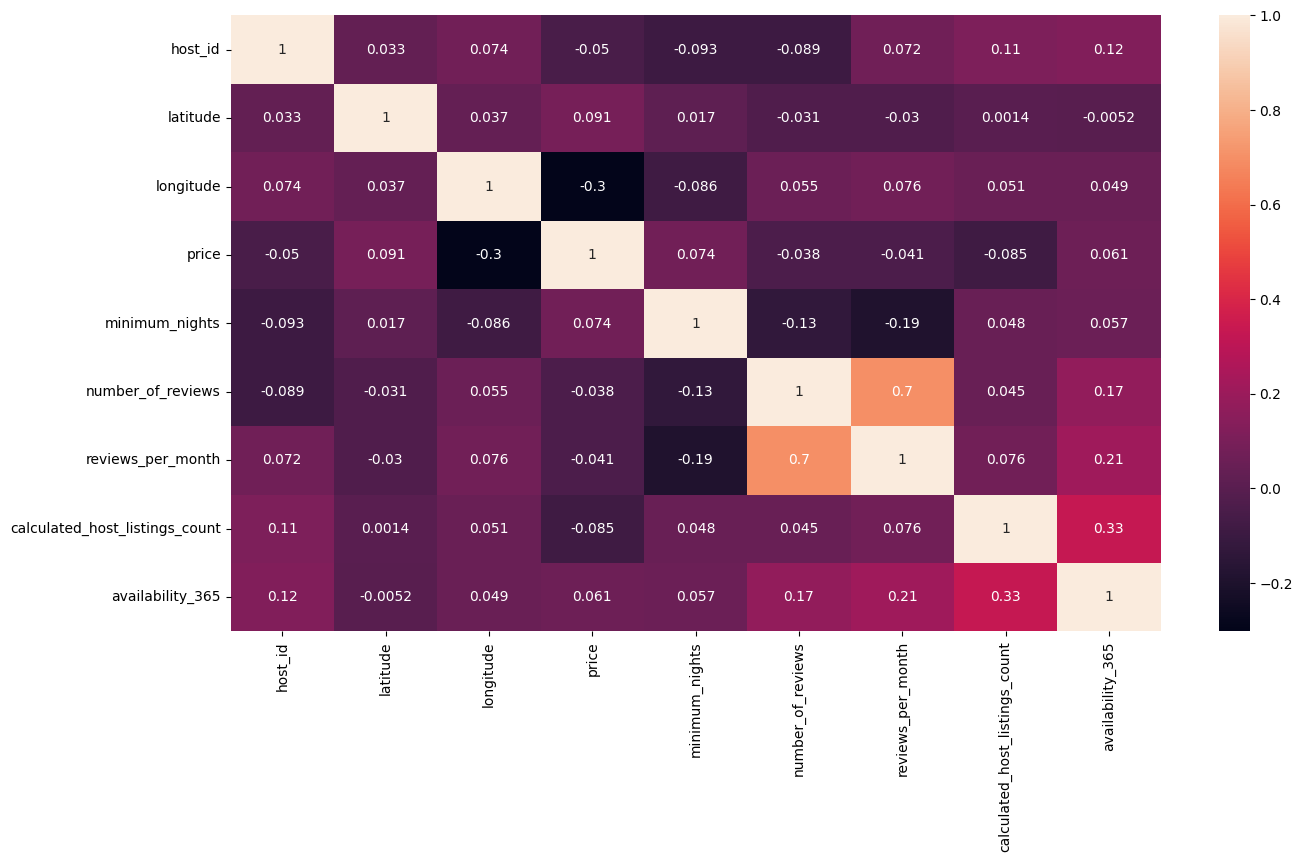

In [112]:
corr = data_float.corr(method='kendall')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)
data_float.columns

In [113]:
data['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [114]:
data['neighbourhood'].unique()

array(['Kensington', 'Midtown', 'Harlem', 'Clinton Hill', 'East Harlem',
       'Murray Hill', 'Bedford-Stuyvesant', "Hell's Kitchen",
       'Upper West Side', 'Chinatown', 'South Slope', 'West Village',
       'Williamsburg', 'Fort Greene', 'Chelsea', 'Crown Heights',
       'Park Slope', 'Windsor Terrace', 'Inwood', 'East Village',
       'Greenpoint', 'Bushwick', 'Flatbush', 'Lower East Side',
       'Prospect-Lefferts Gardens', 'Long Island City', 'Kips Bay',
       'SoHo', 'Upper East Side', 'Prospect Heights',
       'Washington Heights', 'Woodside', 'Brooklyn Heights',
       'Carroll Gardens', 'Gowanus', 'Flatlands', 'Cobble Hill',
       'Flushing', 'Boerum Hill', 'Sunnyside', 'DUMBO', 'St. George',
       'Highbridge', 'Financial District', 'Ridgewood',
       'Morningside Heights', 'Jamaica', 'Middle Village', 'NoHo',
       'Ditmars Steinway', 'Flatiron District', 'Roosevelt Island',
       'Greenwich Village', 'Little Italy', 'East Flatbush',
       'Tompkinsville', 'Asto

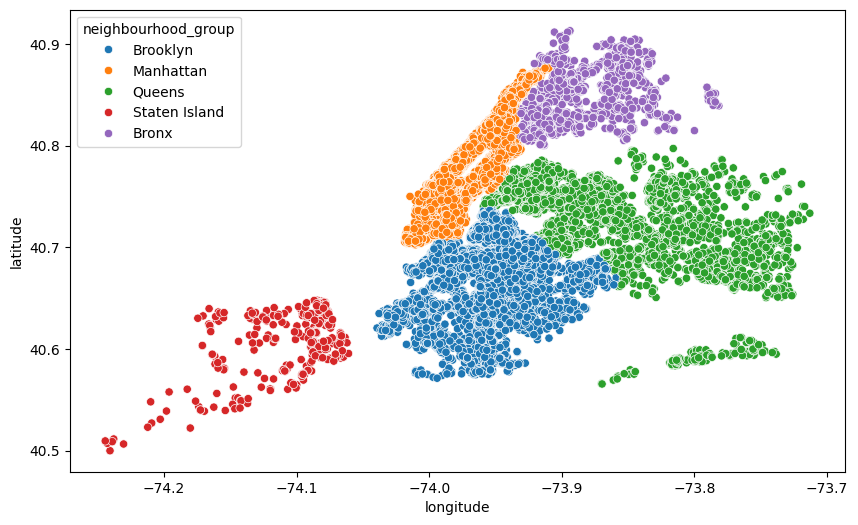

In [115]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=data.longitude, y=data.latitude, hue=data.neighbourhood_group)
plt.show()

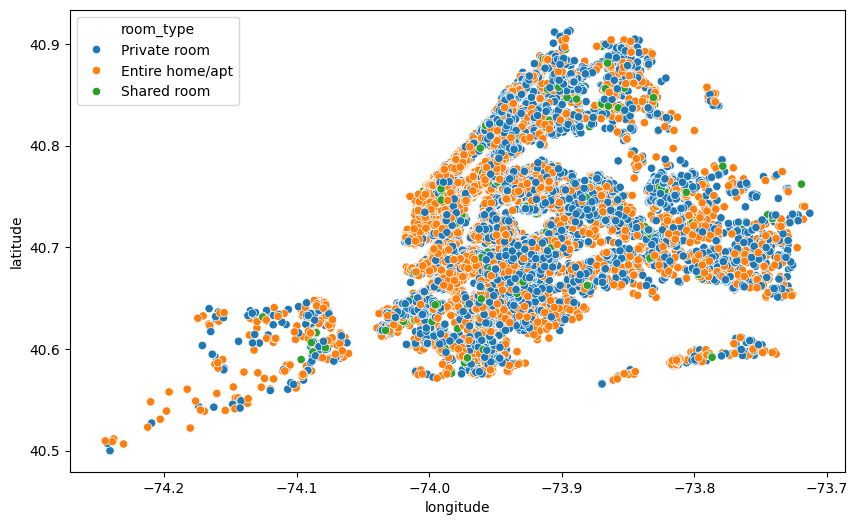

In [116]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=data.longitude, y=data.latitude, hue=data.room_type)
plt.show()

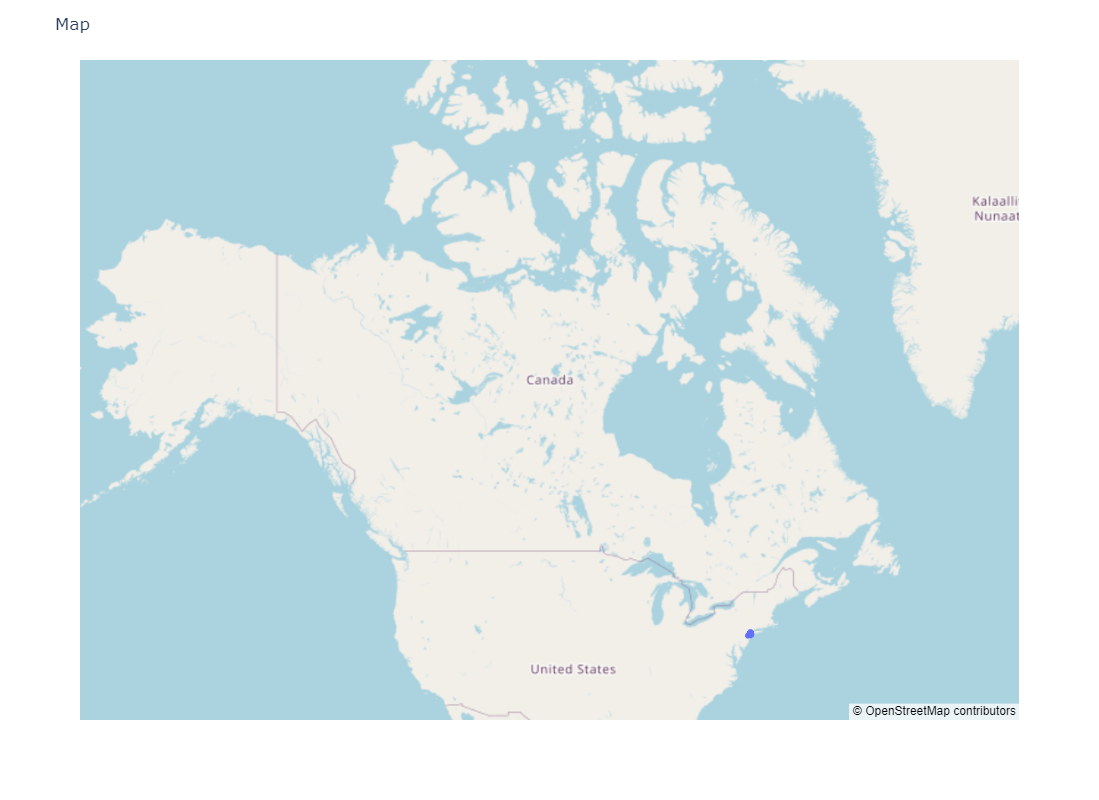

In [143]:
fig = px.scatter_mapbox(data, lat="latitude", lon="longitude", 
                        zoom=7, height=800, width=1000,) 
fig.update_layout(mapbox_style="open-street-map", title='Map')
fig.show()

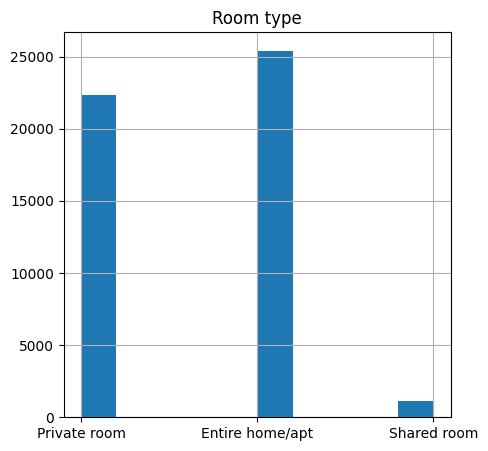

In [118]:
plt.figure(figsize=(5,5))
plt.title('Room type')
data['room_type'].hist()
plt.show()

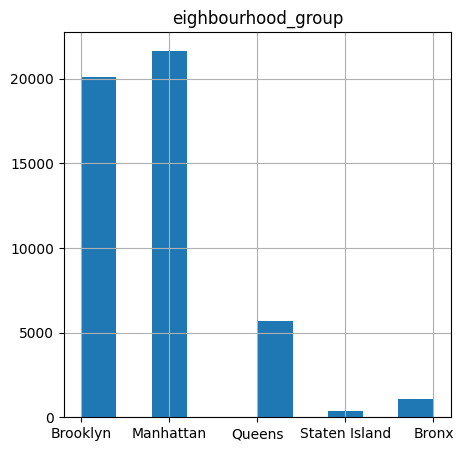

In [119]:
plt.figure(figsize=(5,5))
plt.title('eighbourhood_group')
data['neighbourhood_group'].hist()
plt.show()

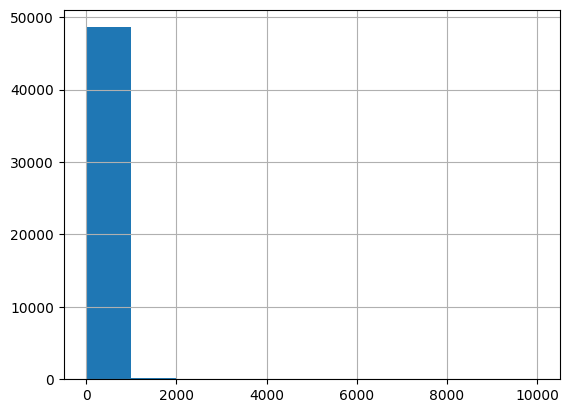

In [120]:
hist_price = data["price"].hist()
plt.show()

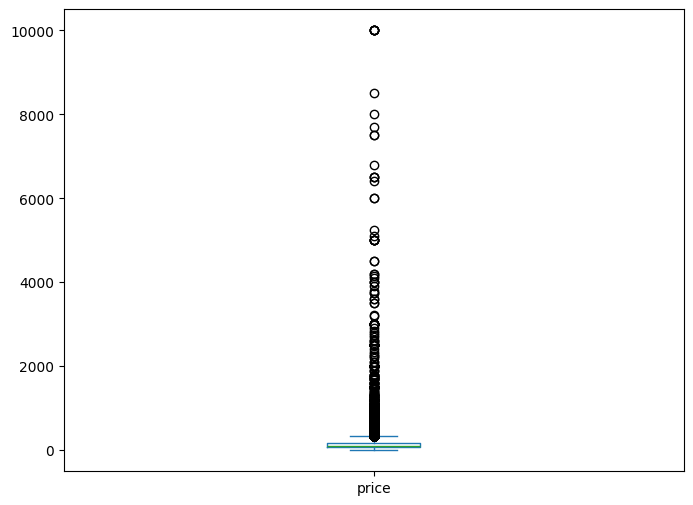

In [121]:
plt.figure(figsize=(8,6))
data['price'].plot(kind='box')
plt.show()

**Delete outliners** 

In [122]:
data = data[data["price"] < 1000]

In [123]:
data

neighbourhood_group       neighbourhood  latitude  longitude  \
0                Brooklyn          Kensington  40.64749  -73.97237   
1               Manhattan             Midtown  40.75362  -73.98377   
2               Manhattan              Harlem  40.80902  -73.94190   
3                Brooklyn        Clinton Hill  40.68514  -73.95976   
4               Manhattan         East Harlem  40.79851  -73.94399   
...                   ...                 ...       ...        ...   
48890            Brooklyn  Bedford-Stuyvesant  40.67853  -73.94995   
48891            Brooklyn            Bushwick  40.70184  -73.93317   
48892           Manhattan              Harlem  40.81475  -73.94867   
48893           Manhattan      Hell's Kitchen  40.75751  -73.99112   
48894           Manhattan      Hell's Kitchen  40.76404  -73.98933   

             room_type  price  minimum_nights  number_of_reviews  \
0         Private room    149               1                  9   
1      Entire home/apt    225               1                 45   
2         Private room    150               3                  0   
3      Entire home/apt     89               1                270   
4      Entire home/apt     80              10                  9   
...                ...    ...             ...                ...   
48890     Private room     70               2                  0   
48891     Private room     40               4                  0   
48892  Entire home/apt    115              10                  0   
48893      Shared room     55               1                  0   
48894     Private room     90               7                  0   

       reviews_per_month  calculated_host_listings_count  availability_365  
0                   0.21                               6               365  
1                   0.38                               2               355  
2                   0.00                               1               365  
3                   4.64                               1               194  
4                   0.10                               1                 0  
...                  ...                             ...               ...  
48890               0.00                               2                 9  
48891               0.00                               2                36  
48892               0.00                               1                27  
48893               0.00                               6                 2  
48894               0.00                               1                23  

[48597 rows x 11 columns]

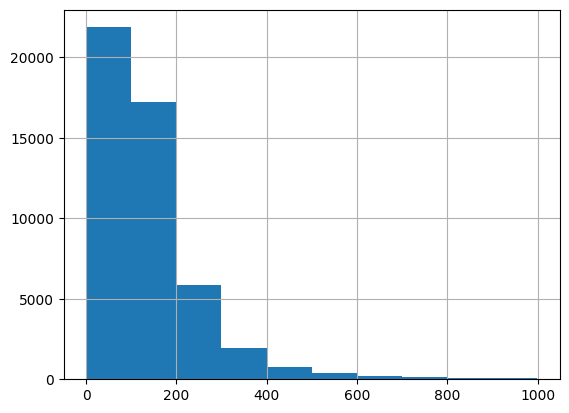

In [124]:
hist_price = data["price"].hist()
plt.show()

**Making a list with numeric features**

In [125]:
num_cols = data.select_dtypes(include=['int', 'float64']).copy()

In [126]:
num_cols = num_cols.columns

In [127]:
num_cols

Index(['latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

latitude
Skew : 0.24


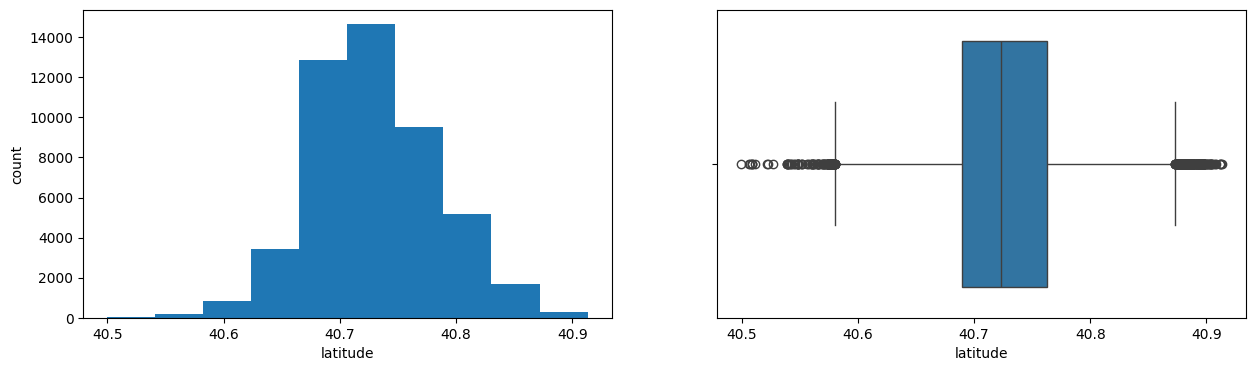

longitude
Skew : 1.28


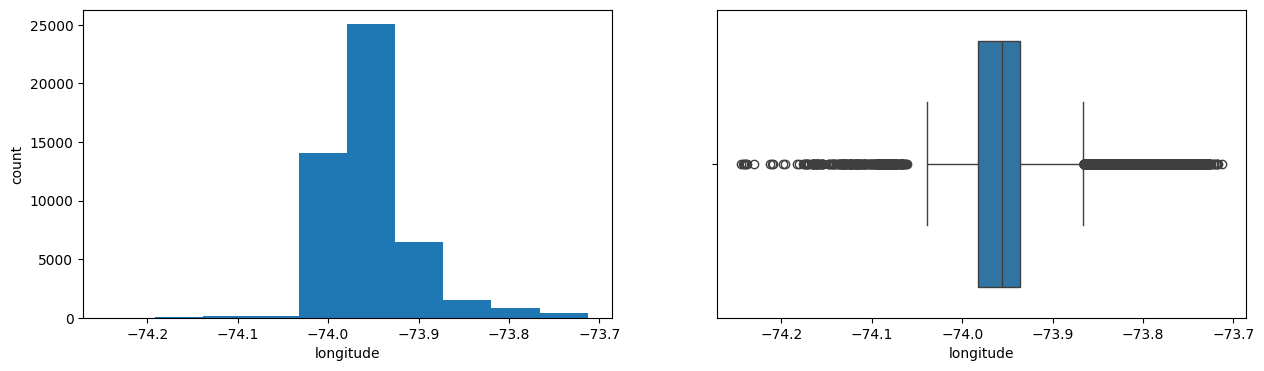

price
Skew : 2.75


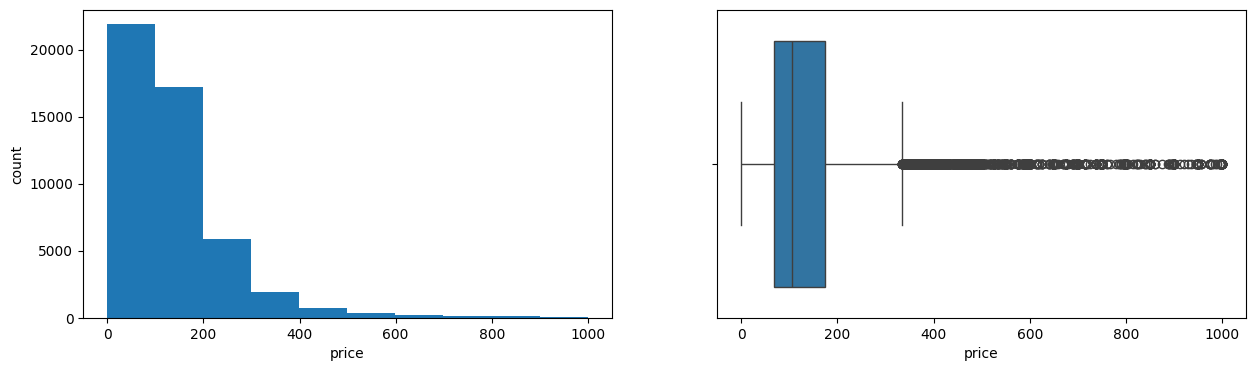

minimum_nights
Skew : 22.35


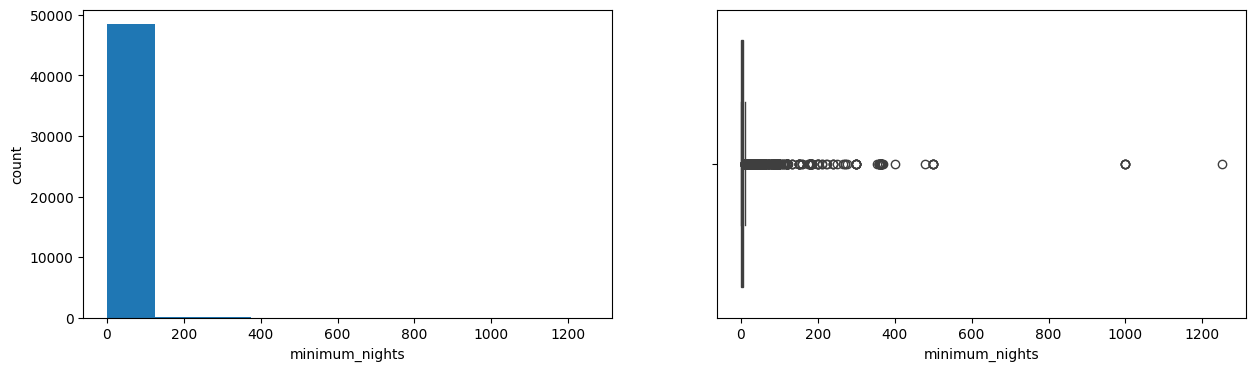

number_of_reviews
Skew : 3.68


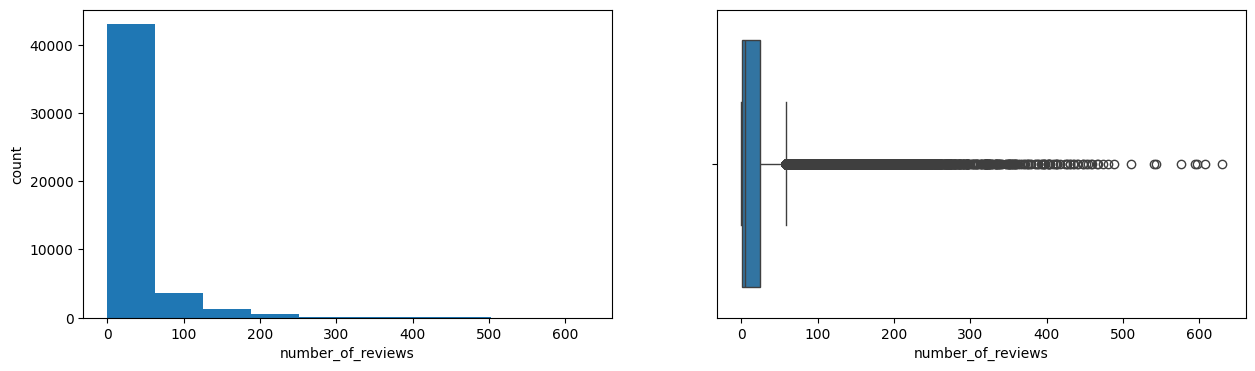

reviews_per_month
Skew : 3.3


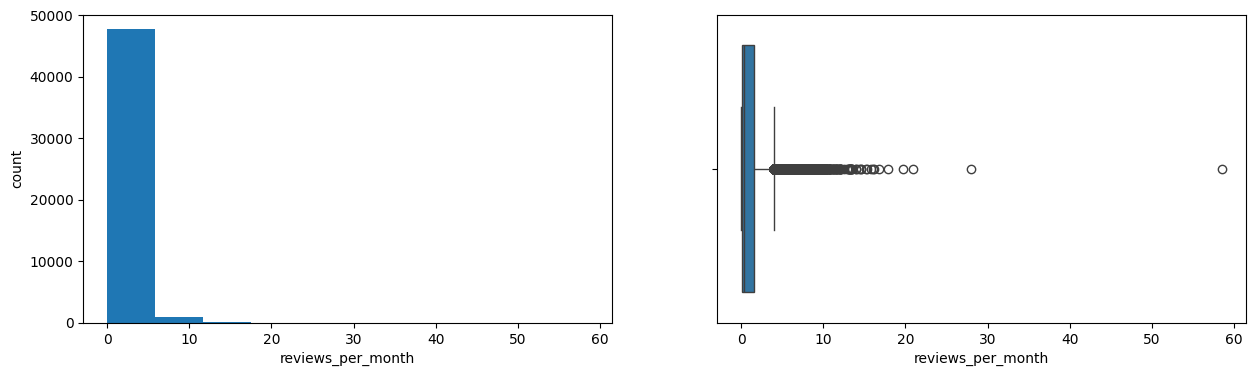

calculated_host_listings_count
Skew : 7.91


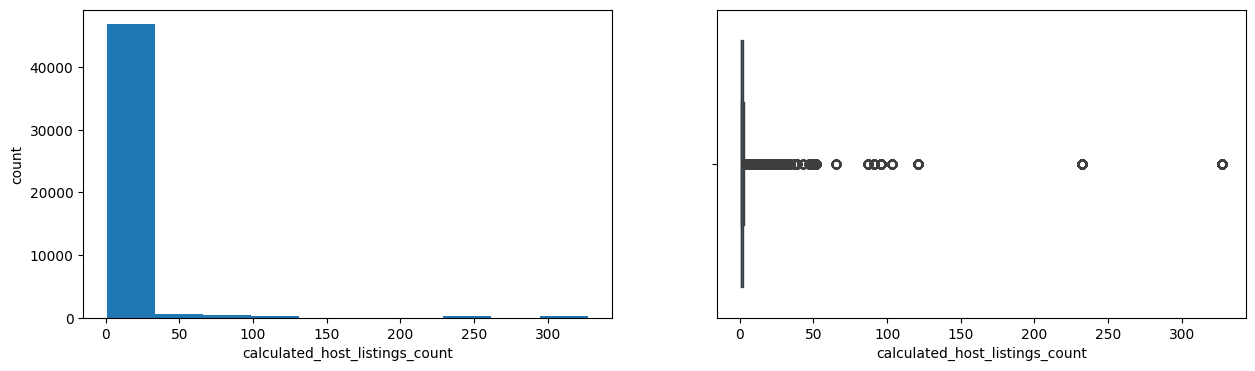

availability_365
Skew : 0.77


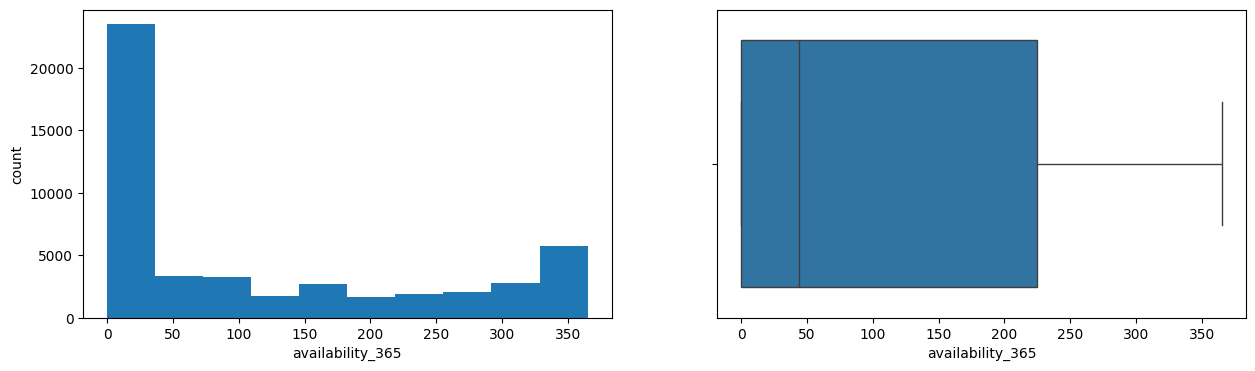

In [128]:
for col in num_cols:
    print(col)
    print('Skew :', round(data[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    data[col].hist(grid=False)
    plt.ylabel('count')
    plt.xlabel(col)
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[col])
    plt.show()

**Data preprocessing**

In [129]:
y = data['price']
data = data.drop('price', axis=1)

In [130]:
data = pd.get_dummies(data, columns=['neighbourhood_group'])

In [131]:
data = pd.get_dummies(data, columns=['neighbourhood'])

In [132]:
data = pd.get_dummies(data, columns=['room_type'])

In [133]:
x_train, x_test, y_train, y_test = train_test_split(data, y, test_size=0.2)

In [134]:
normalizer = StandardScaler()
X_train = normalizer.fit_transform(x_train)
X_train = pd.DataFrame(data=x_train)

X_test = normalizer.fit_transform(x_test)
X_test = pd.DataFrame(data=X_test)

**Modeling with XGBRegressor and RandomForestRegressor**

In [135]:
xgb_cv_scores, xgb_preds = list(), list()
rf_cv_scores, rf_preds = list(), list()

kf = KFold(n_splits=4, random_state=42, shuffle=True)

for i, (train_ix, test_ix) in enumerate(kf.split(x_train)):
    X_train, X_test = x_train.iloc[train_ix], x_train.iloc[test_ix]
    Y_train, Y_test = y_train.iloc[train_ix], y_train.iloc[test_ix]
    
    
    xgb_md = XGBRegressor(colsample_bytree=0.4, gamma=0, learning_rate=0.07,
                          max_depth=10, min_child_weight=1.5, n_estimators=1000,                                                                    
                          subsample=0.6, random_state=42).fit(X_train, Y_train)
    xgb_pred = xgb_md.predict(X_test)   
    xgb_score_fold = np.sqrt(mean_squared_error(Y_test, xgb_pred))
    print('Fold', i+1, '==> XGBoost oof RMSE score is ==>', xgb_score_fold)
    xgb_cv_scores.append(xgb_score_fold)
    
    xgb_pred_test = xgb_md.predict(x_test)
    xgb_preds.append(xgb_pred_test)

    
    rf_md = RandomForestRegressor(random_state=42,
                                  n_jobs=-1).fit(X_train, Y_train)
    rf_pred = rf_md.predict(X_test) 
    rf_score_fold = np.sqrt(mean_squared_error(Y_test, rf_pred))
    print('Fold', i+1, '==> RF oof RMSE score is ==>', rf_score_fold)
    rf_cv_scores.append(rf_score_fold)
    
    rf_pred_test = rf_md.predict(x_test)
    rf_preds.append(rf_pred_test) 
    
print('Average RMSE of XGBoost model is:', np.mean(xgb_cv_scores))
print('Average RMSE of RF model is:', np.mean(rf_cv_scores))

Fold 1 ==> XGBoost oof RMSE score is ==> 85.18963427151971
Fold 1 ==> RF oof RMSE score is ==> 83.24636572972636
Fold 2 ==> XGBoost oof RMSE score is ==> 85.92937394243908
Fold 2 ==> RF oof RMSE score is ==> 84.24576773479777
Fold 3 ==> XGBoost oof RMSE score is ==> 87.17337581112616
Fold 3 ==> RF oof RMSE score is ==> 85.65897582168996
Fold 4 ==> XGBoost oof RMSE score is ==> 85.06233052176951
Fold 4 ==> RF oof RMSE score is ==> 84.1492914963482
Average RMSE of XGBoost model is: 85.83867863671362
Average RMSE of RF model is: 84.32510019564057


**Tuning with Optuna for CatboostRegressor**

In [136]:
def objective_cat(trial):
    """Define the objective function"""
    train_x, test_x, train_y, test_y = train_test_split(x_train, y_train, test_size=0.15,random_state=42)
    params = {
        'objective': trial.suggest_categorical('objective', ['RMSE']),
        'logging_level': trial.suggest_categorical('logging_level', ['Silent']),
        "random_seed" : trial.suggest_categorical('random_seed', [42]),
        "iterations" : trial.suggest_int("iterations", 500, 1500),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.15),
        "depth" : trial.suggest_int("depth", 5, 8),
        'subsample': trial.suggest_float('subsample', 0.6, 0.9),
        "colsample_bylevel": trial.suggest_float("colsample_bylevel", 0.1, 0.5),
        'min_data_in_leaf': trial.suggest_int('min_data_in_leaf', 5, 20),
        'bagging_temperature' :trial.suggest_loguniform('bagging_temperature', 0.01, 1),
        'leaf_estimation_iterations': trial.suggest_int('leaf_estimation_iterations',10,30),
        'reg_lambda': trial.suggest_uniform('reg_lambda',50,100),

    }
    model_cat = CatBoostRegressor(**params)
    model_cat.fit(train_x, train_y)
    y_pred = model_cat.predict(test_x)
    return mean_squared_error(test_y,y_pred, squared=False)


In [137]:
study_cat = optuna.create_study(direction='minimize')
optuna.logging.set_verbosity(optuna.logging.WARNING)
study_cat.optimize(objective_cat, n_trials=50,show_progress_bar=True)

  0%|          | 0/50 [00:00<?, ?it/s]

C:\Users\Shant\AppData\Local\Temp\ipykernel_22056\1499225466.py:14: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

C:\Users\Shant\AppData\Local\Temp\ipykernel_22056\1499225466.py:16: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

C:\Users\Shant\AppData\Local\Temp\ipykernel_22056\1499225466.py:14: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

C:\Users\Shant\AppData\Local\Temp\ipykernel_22056\1499225466.py:16: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com

In [138]:
print('Best parameters', study_cat.best_params)

Best parameters {'objective': 'RMSE', 'logging_level': 'Silent', 'random_seed': 42, 'iterations': 1346, 'learning_rate': 0.06280997923985569, 'depth': 8, 'subsample': 0.7584727201411365, 'colsample_bylevel': 0.4613916159878261, 'min_data_in_leaf': 11, 'bagging_temperature': 0.07266697172044759, 'leaf_estimation_iterations': 14, 'reg_lambda': 76.94801436000223}


**Prediction**

In [139]:
cat = CatBoostRegressor(**study_cat.best_params)
cat.fit(x_train, y_train)
y_pred = cat.predict(x_test)

print('Error: ', mean_squared_error(y_test,y_pred, squared=False))

Error:  79.91118329795972


**Feature importances**

In [140]:
importances = cat.get_feature_importance(type='PredictionValuesChange')
feature_importances = pd.DataFrame(importances, index=data.columns).sort_values(by=0, ascending=False)

In [141]:
feature_importances = feature_importances[feature_importances[0] > 0.2]

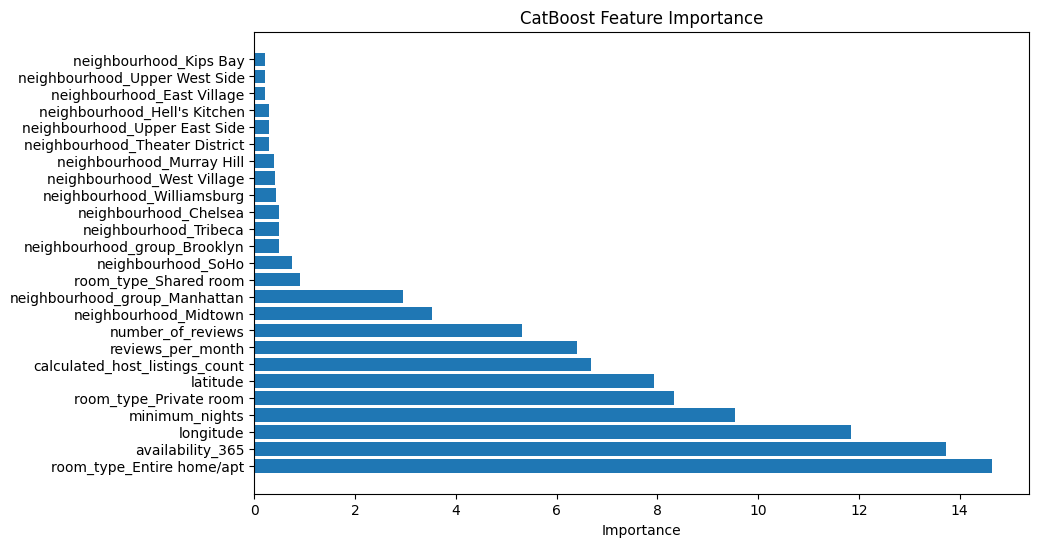

In [142]:
plt.figure(figsize=(10, 6))
plt.barh(feature_importances.index, feature_importances.values.flatten())  # преобразование DataFrame к массиву numpy
plt.title('CatBoost Feature Importance')
plt.xlabel('Importance')
plt.show()